# train unit_id重複状況の可視化

trainデータ内で同一`unit_id`がN回出現する物件の割合を、物件種別（戸建/マンション）ごとに棒グラフで把握するためのノートブックです。



In [ ]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

pd.options.display.max_rows = 200
sns.set_theme(style="whitegrid")

ROOT = Path("/Users/takamiya/work/0000_repos/signate_comp_2nd")
TRAIN_PATH = ROOT / "data/raw/signate/train.csv"
train = pd.read_csv(TRAIN_PATH, usecols=["bukken_type", "unit_id"])

train["unit_id"] = train["unit_id"].astype("Int64")
train = train.dropna(subset=["unit_id"])

TYPE_MAP = {1202: "kodate", 1302: "mansion"}
train["bukken_type_label"] = train["bukken_type"].map(TYPE_MAP)

print(f"train rows (after dropping unit_id NA): {len(train):,}")
train.head()



train rows (after dropping unit_id NA): 363,924


,unit_id,bukken_type,bukken_type_label
0,262186,1202,kodate
1,35726,1202,kodate
2,116820,1202,kodate
3,281648,1202,kodate
4,85898,1302,mansion


In [ ]:
counts = (
    train.groupby(["bukken_type_label", "unit_id"])
    .size()
    .reset_index(name="repeat_count")
)

# unit_idごとの出現回数をヒストグラム化してシェアを算出
distribution = (
    counts.groupby(["bukken_type_label", "repeat_count"])
    .size()
    .reset_index(name="property_count")
)
distribution["share_percent"] = (
    distribution.groupby("bukken_type_label")["property_count"].transform(lambda x: x / x.sum() * 100)
)

distribution = distribution.sort_values(["bukken_type_label", "repeat_count"]).reset_index(drop=True)
distribution



,bukken_type_label,repeat_count,property_count,share_percent
0,kodate,1,71225,67.126903
1,kodate,2,21262,20.038641
2,kodate,3,7707,7.263560
3,kodate,4,3144,2.963103
4,kodate,5,1512,1.425004
5,kodate,6,703,0.662551
6,kodate,7,330,0.311013
7,kodate,8,222,0.209227
8,mansion,1,107657,74.636375
9,mansion,2,25543,17.708434


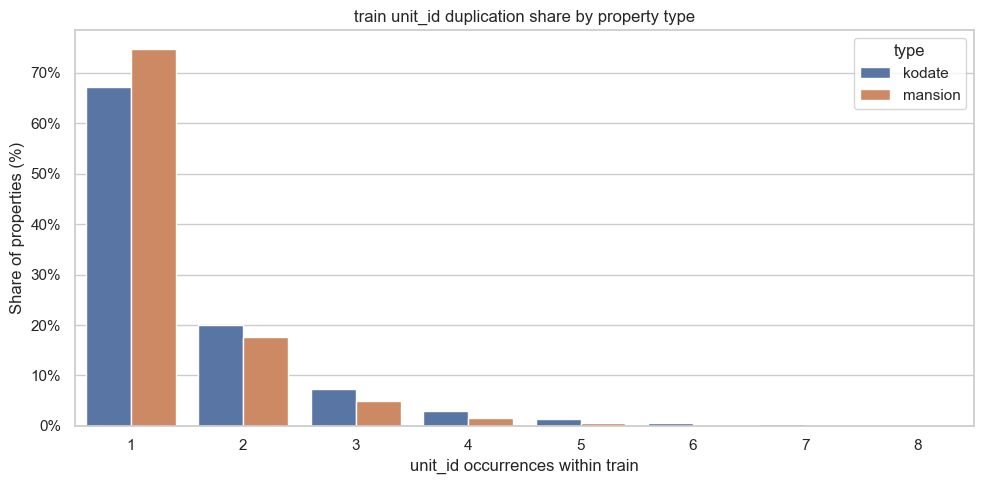

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=distribution,
    x="repeat_count",
    y="share_percent",
    hue="bukken_type_label",
)
plt.title("train unit_id duplication share by property type")
plt.xlabel("unit_id occurrences within train")
plt.ylabel("Share of properties (%)")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(title="type")
plt.tight_layout()
plt.show()

